In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
np.random.seed(123)
%matplotlib inline

# Dataset

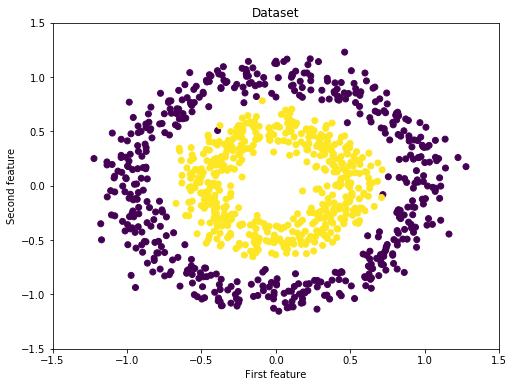

In [3]:
X,y = make_circles(n_samples=1000,factor=0.5,noise=0.1)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [4]:
y.shape

(1000,)

In [5]:
y_ture = y[:,np.newaxis]
y_ture.shape

(1000, 1)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y_ture)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


# Neural Network Class

In [43]:
class NeuralNet():
    def __init__(self,n_inputs,n_outputs,n_hidden):
        self.n_inputs= n_inputs
        self.n_outputs = n_outputs
        self.hidden = n_hidden
        
        #Initialize weight matrices and bias vectors
        self.W_h = np.random.randn(self.n_inputs,self.hidden)
        self.b_h = np.zeros((1,self.hidden))
        self.W_o = np.random.randn(self.hidden,self.n_outputs)
        self.b_o = np.zeros((1,self.n_outputs))
        
    def sigmoid(self,a):
        return 1 / (1+np.exp(-a))
    
    def forward_pass(self,X):
        A_h = np.dot(X,self.W_h) + self.b_h
        O_h = np.tanh(A_h)
        
        A_o = np.dot(O_h,self.W_o) + self.b_o
        O_o = self.sigmoid(A_o)
        
        outputs = {
            "A_h": A_h,
            "A_o": A_o,
            "O_h": O_h,
            "O_o": O_o,
        }
        return outputs
    def cost(self,y_true,y_predict,n_samples):
        cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
        
        cost = np.squeeze(cost)
        assert isinstance(cost,float)  #表达式为False报错
        return cost
    def backward_pass(self,X,Y,n_samples,outputs):
        dA_o = (outputs["O_o"] - Y)
        dW_o = (1 / n_samples) * np.dot(outputs["O_h"].T, dA_o)
        db_o = (1 / n_samples) * np.sum(dA_o)

        dA_h = (np.dot(dA_o, self.W_o.T)) * (1 - np.power(outputs["O_h"], 2))
        dW_h = (1 / n_samples) * np.dot(X.T, dA_h)
        db_h = (1 / n_samples) * np.sum(dA_h)

        gradients = {
                "dW_o": dW_o,
                "db_o": db_o,
                "dW_h": dW_h,
                "db_h": db_h,
                }

        return gradients
    def update_weights(self,gradients,eta):
        self.W_o = self.W_o - eta * gradients["dW_o"]
        self.W_h = self.W_h - eta * gradients["dW_h"]
        self.b_o = self.b_o - eta * gradients["db_o"]
        self.b_h = self.b_h - eta * gradients["db_h"]
    def train(self,X,y,n_iters=500,eta=0.3):
        n_samples, _ = X.shape
        for i in range(n_iters):
            outputs = self.forward_pass(X)
            #print(y.shape)
            #print(outputs["O_o"].shape)
            cost = self.cost(y,outputs["O_o"],n_samples=n_samples)
            gradients = self.backward_pass(X,y,n_samples,outputs)
            
            if i%100==0:
                print(f'cost at iteration {i}: {np.around(cost,4)}')
            self.update_weights(gradients,eta)
    def predict(self,X):
        outputs = self.forward_pass(X)
        y_pred = [1 if elem >= 0.5 else 0 for elem in outputs["O_o"]]
        return np.array(y_pred)[:,np.newaxis]

# Initializing and training the neural network

In [44]:
nn = NeuralNet(n_inputs=2,n_hidden=6,n_outputs=1)
print("Shape of weight matrices and bias vectors:")
print(f'W_h shape: {nn.W_h.shape}')
print(f'b_h shape: {nn.b_h.shape}')
print(f'W_o shape: {nn.W_o.shape}')
print(f'b_o shape: {nn.b_o.shape}')

print("Training:")
nn.train(X_train,y_train,n_iters=2000,eta=0.7)

Shape of weight matrices and bias vectors:
W_h shape: (2, 6)
b_h shape: (1, 6)
W_o shape: (6, 1)
b_o shape: (1, 1)
Training:
cost at iteration 0: 0.7684
cost at iteration 100: 0.2862
cost at iteration 200: 0.1517
cost at iteration 300: 0.1114
cost at iteration 400: 0.091
cost at iteration 500: 0.0768
cost at iteration 600: 0.0649
cost at iteration 700: 0.0551
cost at iteration 800: 0.0483
cost at iteration 900: 0.0436
cost at iteration 1000: 0.0403
cost at iteration 1100: 0.0378
cost at iteration 1200: 0.0359
cost at iteration 1300: 0.0343
cost at iteration 1400: 0.0329
cost at iteration 1500: 0.0318
cost at iteration 1600: 0.0308
cost at iteration 1700: 0.0299
cost at iteration 1800: 0.0291
cost at iteration 1900: 0.0284


# Testing the neural network

In [46]:
y_predict = nn.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict==y_test)/y_test.shape)*100}%")

Classification accuracy on test set: [   99.6 24900. ]%


# Visualizing the decision boundary

In [51]:
X_temp, y_temp = make_circles(n_samples=6000, noise=0.5)
y_predict_temp = nn.predict(X_temp)
y_predict_temp.shape

(6000, 1)

In [53]:
y_predict_temp = np.ravel(y_predict_temp)
y_predict_temp.shape

(6000,)

Text(0.5, 1.0, 'Decision boundary')

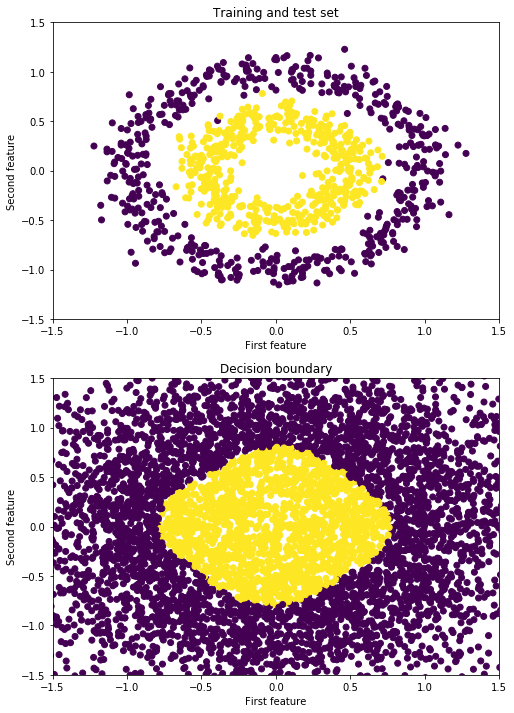

In [54]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(2,1,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Training and test set")

ax = fig.add_subplot(2,1,2)
plt.scatter(X_temp[:,0], X_temp[:,1], c=y_predict_temp)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Decision boundary")